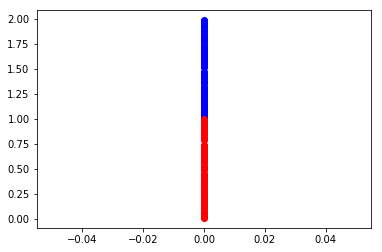

Predicted labels:[[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1. 1. 1. 1. 1.]] Actual labels:[[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 

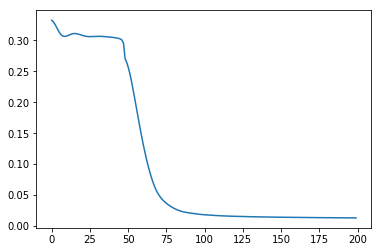

In [203]:
## Training data

import numpy as np
import matplotlib.pyplot as plt
np.random.seed(0)
%matplotlib inline

# Defining inputs(X) with their labels(y)
x1 = np.random.rand(1, 100) + 1
y1 = np.ones((1,100))

x2 = np.random.rand(1, 100)
y2 = np.zeros((1,100))

x = np.hstack((x1, x2))
y = np.hstack((y1, y2))
m = y.size #Number of training examples

#Plotting training data
plt.plot(x1,'bo', x2, 'ro')
plt.show()

#Normalizing training data, use same mean and variance on test data
mean = np.sum(x, axis=1, keepdims=True)/m
x = x - mean
variance = (np.sum(np.square(x),axis=1, keepdims=True))/m
x = x/(variance**2)

# Initializing weights, bias for the 4 layers
w1 = np.random.randn(5,1) * np.sqrt(2/1) # prevents vanishing gradients by setting w equal to var(2/n) for relu
w2 = np.random.randn(4,5) * np.sqrt(2/5) 
w3 = np.random.randn(2,4) * np.sqrt(2/4)
w4 = np.random.randn(1,2) * 0.001    #np.sqrt(1/2) var(1/n) for those not relu
b1 = np.zeros((5,1))
b2 = np.zeros((4,1))
b3 = np.array([[0.9],[0.5]])
b4 = 0.7

# Hyperparameters
iterations = 200
decay_rate = 0.01
initial_lr = 1.8
lambd = 0.1
beta1 = 0.9
beta2 = 0.999
epsilon = 10**(0)
#keep_prob = 0.8 for dropout layer should it be used

#Lists for monitoring gradient descent per iteration
cost_list = []
iteration_list = []

#Function to obtain derivative of the relu activation function
def drelu(z):
    return np.where(z<0, z*0, z*0+1)

#Adam optimizer parameters
vdw4=0 
sdw4=0 
vdb4=0 
sdb4=0 
vdw3=0 
sdw3=0
vdb3=0 
sdb3=0
vdw2=0 
sdw2=0
vdb2=0 
sdb2=0
vdw2=0
vdw1=0
sdw1=0 
vdb1=0
sdb1=0

for i in range(iterations):
    #Learning rate decay not necessary in this case
    lr = (1/(1 + (decay_rate * i)))*initial_lr
    
    # Function to predict before applying activation function
    z1 = np.dot(w1, x) + b1 
    
    # Predicted a1 (applying the relu activation function)
    a1 = np.maximum(0, z1)

    #dropout can be done, it is however not implemented at test time
    #drop1 = np.random.rand(a1.shape[0], a1.shape[1]) < keep_prob
    #a1 = np.multiply(a1, drop1)
    #a1 /= keep_prob
    da1 = z1
    da1 = drelu(da1)
    
   
    # 2nd layer with relu activation function
    z2 = np.dot(w2, a1) + b2
    a2 = np.maximum(0, z2)
    da2 = z2
    da2 = drelu(da2)
        
    # 3rd layer with relu activation function
    z3 = np.dot(w3, a2) + b3
    a3 = np.maximum(0, z3)
    da3 = z3
    da3 = drelu(da3)
     
    # 4th (output) layer with sigmoid activation function
    z4 = np.dot(w4, a3) + b4
    a4 = 1 / (1 + np.exp(-z4))
    
    if i==0:
        print('Predicted labels:' + str(np.round(a4)), 'Actual labels:' + str(y))
        
    # Derivatve of the sigmoid activation function
    da4 = (a4 * (1-a4))
    
    # Calculating the loss
    loss = -1 * ((y * np.log10(a4)) + ((1-y) * np.log10((1-a4))))

    # Calculating the cost function with L2 regularization
    initial_cost = ((np.sum(loss))/(m))
    L2_regularization_cost = (np.sum(np.square(w1)) + np.sum(np.square(w2)) + np.sum(np.square(w3)) + np.sum(np.square(w4)))*(lambd/(2*m))
    cost = initial_cost + L2_regularization_cost
    #print('cost', cost)
    cost_list.append(cost)
    iteration_list.append(i)
    
    # Gradient descent with Adam optimization
    dz4 = ((-y/a4) + ((1-y)/(1-a4))) * da4
    dw4 = np.dot(dz4, a3.T)/(m) + ((lambd/m)* w4)
    db4 = (np.sum(dz4, axis=1, keepdims = True))/(m)
    vdw4 = (beta1*vdw4) + (1-beta1)*dw4
    vdb4 = (beta1*vdb4) + (1-beta1)*db4
    sdw4 = (beta2*sdw4) + (1-beta2)*np.square(dw4)
    sdb4 = (beta2*sdb4) + (1-beta2)*np.square(db4)
    vdw4_c = vdw4/(1-(beta1**iterations))
    vdb4_c = vdb4/(1-(beta1**iterations))
    sdw4_c = sdw4/(1-(beta2**iterations))
    sdb4_c = sdb4/(1-(beta2**iterations))
    
    
    dz3 = (np.dot(w4.T,dz4)) * (da3)
    dw3 = np.dot(dz3, a2.T)/(m) + ((lambd/m)* w3)
    db3 = (np.sum(dz3, axis=1, keepdims = True))/(m)
    vdw3 = (beta1*vdw3) + (1-beta1)*dw3
    vdb3 = (beta1*vdb3) + (1-beta1)*db3
    sdw3 = (beta2*sdw3) + (1-beta2)*np.square(dw3)
    sdb3 = (beta2*sdb3) + (1-beta2)*np.square(db3)
    vdw3_c = vdw3/(1-(beta1**iterations))
    vdb3_c = vdb3/(1-(beta1**iterations))
    sdw3_c = sdw3/(1-(beta2**iterations))
    sdb3_c = sdb3/(1-(beta2**iterations))
    
    dz2 = (np.dot(w3.T,dz3)) * (da2)
    dw2 = np.dot(dz2, a1.T)/(m) + ((lambd/m)* w2)
    db2 = (np.sum(dz2, axis=1, keepdims = True))/(m)
    vdw2 = (beta1*vdw2) + (1-beta1)*dw2
    vdb2 = (beta1*vdb2) + (1-beta1)*db2
    sdw2 = (beta2*sdw2) + (1-beta2)*np.square(dw2)
    sdb2 = (beta2*sdb2) + (1-beta2)*np.square(db2)
    vdw2_c = vdw2/(1-(beta1**iterations))
    vdb2_c = vdb2/(1-(beta1**iterations))
    sdw2_c = sdw2/(1-(beta2**iterations))
    sdb2_c = sdb2/(1-(beta2**iterations))
    
    dz1 = (np.dot(w2.T,dz2)) * (da1)
    dw1 = np.dot(dz1, x.T)/(m) + ((lambd/m)* w1)
    db1 = (np.sum(dz1, axis=1, keepdims = True))/(m)
    vdw1 = (beta1*vdw1) + (1-beta1)*dw1
    vdb1 = (beta1*vdb1) + (1-beta1)*db1
    sdw1 = (beta2*sdw1) + (1-beta2)*np.square(dw1)
    sdb1 = (beta2*sdb1) + (1-beta2)*np.square(db1)
    vdw1_c = vdw1/(1-(beta1**iterations))
    vdb1_c = vdb1/(1-(beta1**iterations))
    sdw1_c = sdw1/(1-(beta2**iterations))
    sdb1_c = sdb1/(1-(beta2**iterations))
    
    

    # Updating weights and bias
    w1 = w1 - np.dot(lr, (vdw1_c/np.square(sdw1_c + epsilon)))
    b1 = b1 - np.dot(lr, (vdb1_c/np.square(sdb1_c + epsilon)))
    w2 = w2 - np.dot(lr, (vdw2_c/np.square(sdw2_c + epsilon)))
    b2 = b2 - np.dot(lr, (vdb2_c/np.square(sdb2_c + epsilon)))
    w3 = w3 - np.dot(lr, (vdw3_c/np.square(sdw3_c + epsilon)))
    b3 = b3 - np.dot(lr, (vdb3_c/np.square(sdb3_c + epsilon)))
    w4 = w4 - np.dot(lr, (vdw4_c/np.square(sdw4_c + epsilon)))
    b4 = b4 - np.dot(lr, (vdb4_c/np.square(sdb4_c + epsilon)))
    
print('Predicted labels:' + str(np.round(a4)), 'Actual labels:' + str(y))
plt.plot(iteration_list, cost_list)
plt.show()

#Sampling parameters r = -4 * np.random.rand(), lr = 10**r, when you want to sample between 1 and 10**-4


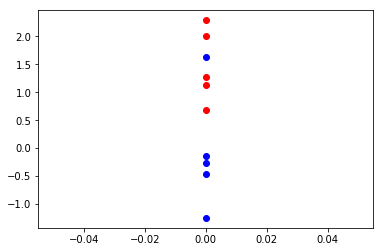

Predicted labels:[[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]] Actual labels:[[1. 1. 1. 1. 1. 0. 0. 0. 0. 0.]]
Predicted labels:[[1. 1. 1. 1. 1. 0. 0. 0. 0. 0.]] Actual labels:[[1. 1. 1. 1. 1. 0. 0. 0. 0. 0.]]


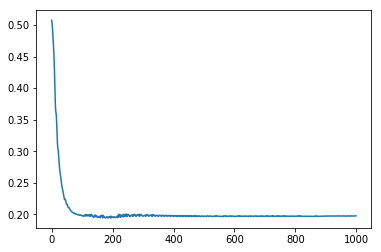

In [205]:
### Validation data

import numpy as np
import matplotlib.pyplot as plt
np.random.seed(38)

# Defining inputs(X) with their labels(y)
x1 = np.random.randn(1, 5) + 1
y1 = np.ones((1,5))

x2 = np.random.randn(1, 5)
y2 = np.zeros((1,5))

x = np.hstack((x1, x2))
y = np.hstack((y1, y2))
m = y.size #Number of training examples

#Plotting training data
plt.plot(x1, 'ro', x2, 'bo')
plt.show()

#Normalizing training data, use same mean and variance on test data
mean = np.sum(x, axis=1, keepdims=True)/m
x = x - mean
variance = (np.sum(np.square(x),axis=1, keepdims=True))/m
x = x/(variance**2)

# Initializing weights, bias for the 4 layers
w1 = np.random.randn(5,1) * np.sqrt(2/1) # prevents vanishing gradients by setting w equal to var(2/n) for relu
w2 = np.random.randn(4,5) * np.sqrt(2/5) 
w3 = np.random.randn(2,4) * np.sqrt(2/4)
w4 = np.random.randn(1,2) * 0.001    #np.sqrt(1/2) var(1/n) for those not relu
b1 = np.zeros((5,1))
b2 = np.zeros((4,1))
b3 = np.array([[0.9],[0.5]])
b4 = 0.7

# Hyperparameters
iterations = 200
decay_rate = 0.01
initial_lr = 1.8
lambd = 0.1
beta1 = 0.9
beta2 = 0.999
epsilon = 10**(0)
#keep_prob = 0.8 for dropout layer should it be used

#Lists for monitoring gradient descent per iteration
cost_list = []
iteration_list = []

#Function to obtain derivative of the relu activation function
def drelu(z):
    return np.where(z<0, z*0, z*0+1)

#Adam optimizer parameters
vdw4=0 
sdw4=0 
vdb4=0 
sdb4=0 
vdw3=0 
sdw3=0
vdb3=0 
sdb3=0
vdw2=0 
sdw2=0
vdb2=0 
sdb2=0
vdw2=0
vdw1=0
sdw1=0 
vdb1=0
sdb1=0

for i in range(iterations):
    #Learning rate decay not necessary in this case
    lr = (1/(1 + (decay_rate * i)))*initial_lr
    
    # Function to predict before applying activation function
    z1 = np.dot(w1, x) + b1 
    
    # Predicted a1 (applying the relu activation function)
    a1 = np.maximum(0, z1)

    #dropout can be done, it is however not implemented at test time
    #drop1 = np.random.rand(a1.shape[0], a1.shape[1]) < keep_prob
    #a1 = np.multiply(a1, drop1)
    #a1 /= keep_prob
    da1 = z1
    da1 = drelu(da1)
    
   
    # 2nd layer with relu activation function
    z2 = np.dot(w2, a1) + b2
    a2 = np.maximum(0, z2)
    da2 = z2
    da2 = drelu(da2)
        
    # 3rd layer with relu activation function
    z3 = np.dot(w3, a2) + b3
    a3 = np.maximum(0, z3)
    da3 = z3
    da3 = drelu(da3)
     
    # 4th (output) layer with sigmoid activation function
    z4 = np.dot(w4, a3) + b4
    a4 = 1 / (1 + np.exp(-z4))
    
    if i==0:
        print('Predicted labels:' + str(np.round(a4)), 'Actual labels:' + str(y))
        
    # Derivatve of the sigmoid activation function
    da4 = (a4 * (1-a4))
    
    # Calculating the loss
    loss = -1 * ((y * np.log10(a4)) + ((1-y) * np.log10((1-a4))))

    # Calculating the cost function with L2 regularization
    initial_cost = ((np.sum(loss))/(m))
    L2_regularization_cost = (np.sum(np.square(w1)) + np.sum(np.square(w2)) + np.sum(np.square(w3)) + np.sum(np.square(w4)))*(lambd/(2*m))
    cost = initial_cost + L2_regularization_cost
    #print('cost', cost)
    cost_list.append(cost)
    iteration_list.append(i)
    
    # Gradient descent with Adam optimization
    dz4 = ((-y/a4) + ((1-y)/(1-a4))) * da4
    dw4 = np.dot(dz4, a3.T)/(m) + ((lambd/m)* w4)
    db4 = (np.sum(dz4, axis=1, keepdims = True))/(m)
    vdw4 = (beta1*vdw4) + (1-beta1)*dw4
    vdb4 = (beta1*vdb4) + (1-beta1)*db4
    sdw4 = (beta2*sdw4) + (1-beta2)*np.square(dw4)
    sdb4 = (beta2*sdb4) + (1-beta2)*np.square(db4)
    vdw4_c = vdw4/(1-(beta1**iterations))
    vdb4_c = vdb4/(1-(beta1**iterations))
    sdw4_c = sdw4/(1-(beta2**iterations))
    sdb4_c = sdb4/(1-(beta2**iterations))
    
    
    dz3 = (np.dot(w4.T,dz4)) * (da3)
    dw3 = np.dot(dz3, a2.T)/(m) + ((lambd/m)* w3)
    db3 = (np.sum(dz3, axis=1, keepdims = True))/(m)
    vdw3 = (beta1*vdw3) + (1-beta1)*dw3
    vdb3 = (beta1*vdb3) + (1-beta1)*db3
    sdw3 = (beta2*sdw3) + (1-beta2)*np.square(dw3)
    sdb3 = (beta2*sdb3) + (1-beta2)*np.square(db3)
    vdw3_c = vdw3/(1-(beta1**iterations))
    vdb3_c = vdb3/(1-(beta1**iterations))
    sdw3_c = sdw3/(1-(beta2**iterations))
    sdb3_c = sdb3/(1-(beta2**iterations))
    
    dz2 = (np.dot(w3.T,dz3)) * (da2)
    dw2 = np.dot(dz2, a1.T)/(m) + ((lambd/m)* w2)
    db2 = (np.sum(dz2, axis=1, keepdims = True))/(m)
    vdw2 = (beta1*vdw2) + (1-beta1)*dw2
    vdb2 = (beta1*vdb2) + (1-beta1)*db2
    sdw2 = (beta2*sdw2) + (1-beta2)*np.square(dw2)
    sdb2 = (beta2*sdb2) + (1-beta2)*np.square(db2)
    vdw2_c = vdw2/(1-(beta1**iterations))
    vdb2_c = vdb2/(1-(beta1**iterations))
    sdw2_c = sdw2/(1-(beta2**iterations))
    sdb2_c = sdb2/(1-(beta2**iterations))
    
    dz1 = (np.dot(w2.T,dz2)) * (da1)
    dw1 = np.dot(dz1, x.T)/(m) + ((lambd/m)* w1)
    db1 = (np.sum(dz1, axis=1, keepdims = True))/(m)
    vdw1 = (beta1*vdw1) + (1-beta1)*dw1
    vdb1 = (beta1*vdb1) + (1-beta1)*db1
    sdw1 = (beta2*sdw1) + (1-beta2)*np.square(dw1)
    sdb1 = (beta2*sdb1) + (1-beta2)*np.square(db1)
    vdw1_c = vdw1/(1-(beta1**iterations))
    vdb1_c = vdb1/(1-(beta1**iterations))
    sdw1_c = sdw1/(1-(beta2**iterations))
    sdb1_c = sdb1/(1-(beta2**iterations))
    
    

    # Updating weights and bias
    w1 = w1 - np.dot(lr, (vdw1_c/np.square(sdw1_c + epsilon)))
    b1 = b1 - np.dot(lr, (vdb1_c/np.square(sdb1_c + epsilon)))
    w2 = w2 - np.dot(lr, (vdw2_c/np.square(sdw2_c + epsilon)))
    b2 = b2 - np.dot(lr, (vdb2_c/np.square(sdb2_c + epsilon)))
    w3 = w3 - np.dot(lr, (vdw3_c/np.square(sdw3_c + epsilon)))
    b3 = b3 - np.dot(lr, (vdb3_c/np.square(sdb3_c + epsilon)))
    w4 = w4 - np.dot(lr, (vdw4_c/np.square(sdw4_c + epsilon)))
    b4 = b4 - np.dot(lr, (vdb4_c/np.square(sdb4_c + epsilon)))
    
print('Predicted labels:' + str(np.round(a4)), 'Actual labels:' + str(y))
plt.plot(iteration_list, cost_list)
plt.show()

#Sampling parameters r = -4 * np.random.rand(), lr = 10**r, when you want to sample between 1 and 10**-4